In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
df = pd.read_csv('auto-mpg.data',delim_whitespace=True, names=column_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
year            398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Data wrangling

In [4]:
# remove 'name'
df = df.drop('name',axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


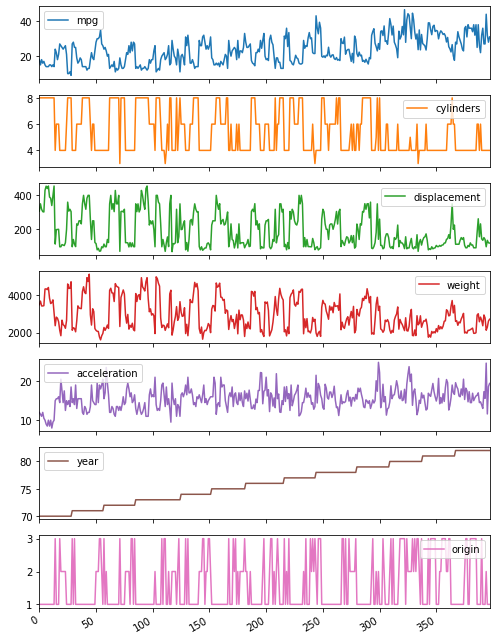

In [5]:
df.plot(subplots=True,figsize=(7,9))
plt.tight_layout()
plt.show()

In [6]:
df.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

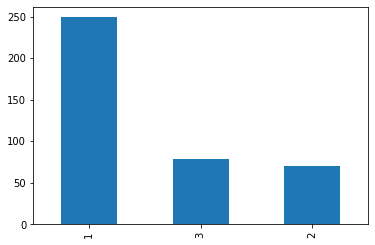

In [7]:
#'origin' is a categorical variable
df.origin.value_counts().plot.bar()
plt.show()

In [8]:
# missing data?
df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [9]:
# remove missing data
df = df.replace('?', np.nan)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null object
weight          392 non-null float64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


In [10]:
# convert into number
df.horsepower = df.horsepower.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [11]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
# origin var into dummy var
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df = pd.get_dummies(df, columns=['origin'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
mpg               392 non-null float64
cylinders         392 non-null int64
displacement      392 non-null float64
horsepower        392 non-null float64
weight            392 non-null float64
acceleration      392 non-null float64
year              392 non-null int64
origin_america    392 non-null uint8
origin_asia       392 non-null uint8
origin_europe     392 non-null uint8
dtypes: float64(5), int64(2), uint8(3)
memory usage: 25.6 KB


### split data

In [14]:
# independent var
X = df.drop('mpg', axis=1)

# target var
y = df[['mpg']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38)
X_train.shape, X_test.shape

((274, 9), (118, 9))

In [15]:
# train model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
regression_model.coef_

array([[-0.39534506,  0.02080559, -0.0131206 , -0.00656046,  0.10204168,
         0.80433362, -1.636008  ,  0.9266791 ,  0.7093289 ]])

In [17]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.39534505992647456
The coefficient for displacement is 0.020805588764152626
The coefficient for horsepower is -0.013120598279425846
The coefficient for weight is -0.0065604638852631925
The coefficient for acceleration is 0.10204167657719246
The coefficient for year is 0.8043336188639099
The coefficient for origin_america is -1.6360080013844889
The coefficient for origin_asia is 0.9266790972194203
The coefficient for origin_europe is 0.709328904165068


In [18]:
pd.DataFrame(data=regression_model.coef_[0], index=X_train.columns,columns=['coeff'])

,coeff
cylinders,-0.395345
displacement,0.020806
horsepower,-0.013121
weight,-0.006560
acceleration,0.102042
year,0.804334
origin_america,-1.636008
origin_asia,0.926679
origin_europe,0.709329


In [19]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -19.486889346812912


### Accuracy metric

In [20]:
# R square
regression_model.score(X_test, y_test)

0.8555020272041134

In [21]:
y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse

8.849086675549772

In [22]:
# RMSE
math.sqrt(regression_model_mse)

2.9747414468403424

### predict the miles per gallon for unseen car
- Cylinders – 4
- Displacement – 121
- Horsepower – 110
- Weight – 2800
- Acceleration – 15.4
- Year – 81
- Origin – Asia

In [23]:
regression_model.predict([[4, 121, 110, 2800, 15.4, 81, 0, 1, 0]])

array([[29.28578601]])